<a href="https://colab.research.google.com/github/priscilla1812/Customer-Churn-Prediction/blob/main/Customer_Churn_Prediction_Priscilla.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Priscilla Philby Oommen

---



# Customer Churn Prediction

In [411]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import roc_curve, auc, log_loss

In [412]:
# Import the dataset and Read telecom_dataset.csv from Google Drive
df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Projects/telecom_dataset.csv")

# View the top 5 rows of df
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,Predicted total day calls,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,100,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,125,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,113,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,70,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,111,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


## Data Overview

In [413]:
# General info about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   state                      3333 non-null   object 
 1   account length             3333 non-null   int64  
 2   area code                  3333 non-null   int64  
 3   phone number               3333 non-null   object 
 4   international plan         3333 non-null   object 
 5   voice mail plan            3333 non-null   object 
 6   number vmail messages      3333 non-null   int64  
 7   total day minutes          3333 non-null   float64
 8   total day calls            3333 non-null   int64  
 9   Predicted total day calls  3333 non-null   int64  
 10  total day charge           3333 non-null   float64
 11  total eve minutes          3333 non-null   float64
 12  total eve calls            3333 non-null   int64  
 13  total eve charge           3333 non-null   float

In [414]:
# Summary statistics
df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,Predicted total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,100.374737,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,20.141806,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [415]:
# Check for missing values
# df.isnull().sum()
df.isnull().values.any() # returns True when there is at least one missing value occurring in the data.

False

In [416]:
df.duplicated().sum()

0

The number of duplicated values is 0.

**international plan, voice mail plan, and target variable 'churn' are categorical variables.**

A categorical variable can be true or false, yes or no, 1 or 0.
Categorical variables need to be encoded into numeric values.

## EDA (Exploratory Data Analysis)

EDA helps to understand the target feature and relationships between features.

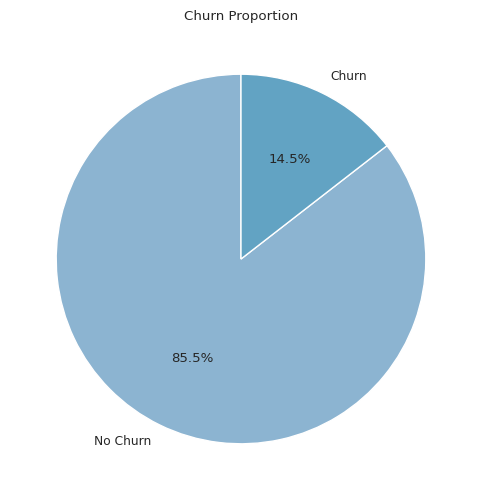

In [417]:
# Churn Proportion (Pie Chart)
# Proportion of Churn vs. Non-Churn
churn_counts = df['churn'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(churn_counts, labels=['No Churn', 'Churn'], autopct='%1.1f%%', startangle=90)
plt.title('Churn Proportion')
plt.show()

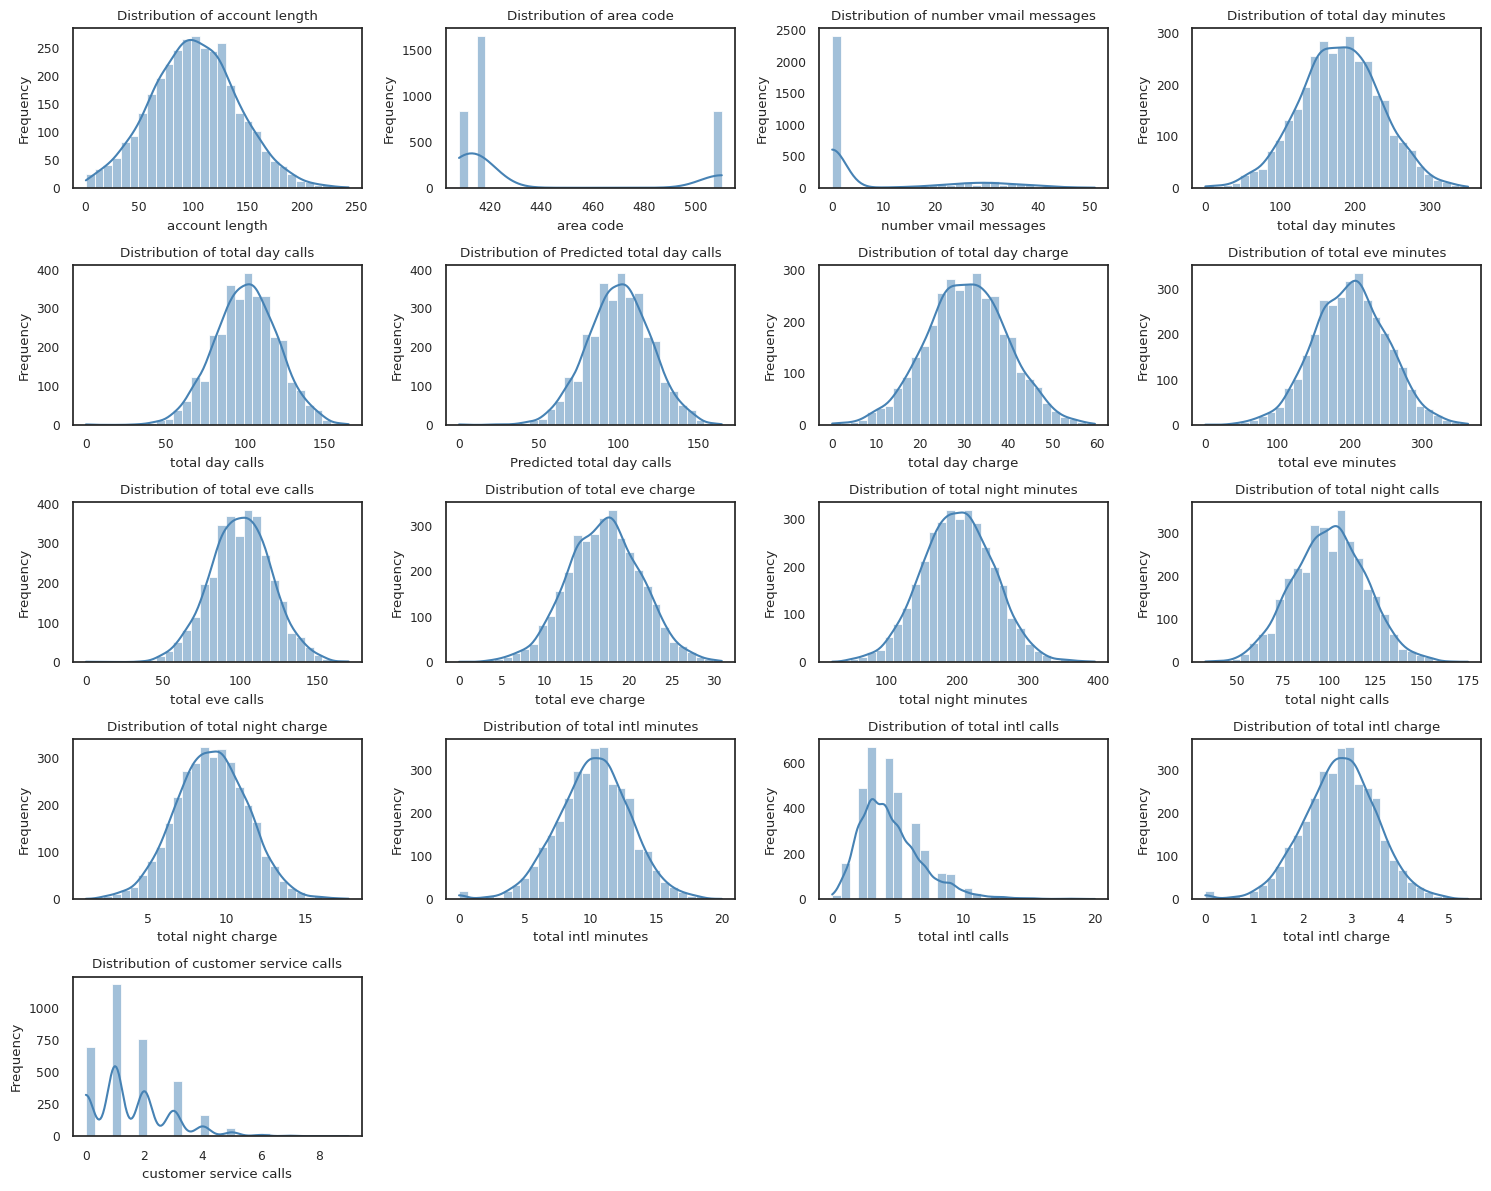

In [418]:
# Distribution of Numerical Features (Histograms)
# Histograms for numerical features

# Select numerical columns
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Plot histograms with KDE
plt.figure(figsize=(15, 12))
for i, col in enumerate(numerical_columns, start=1):
    plt.subplot(5, 4, i)  # Adjust rows and columns as per the number of features
    sns.histplot(data=df, x=col, kde=True, color='steelblue', bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

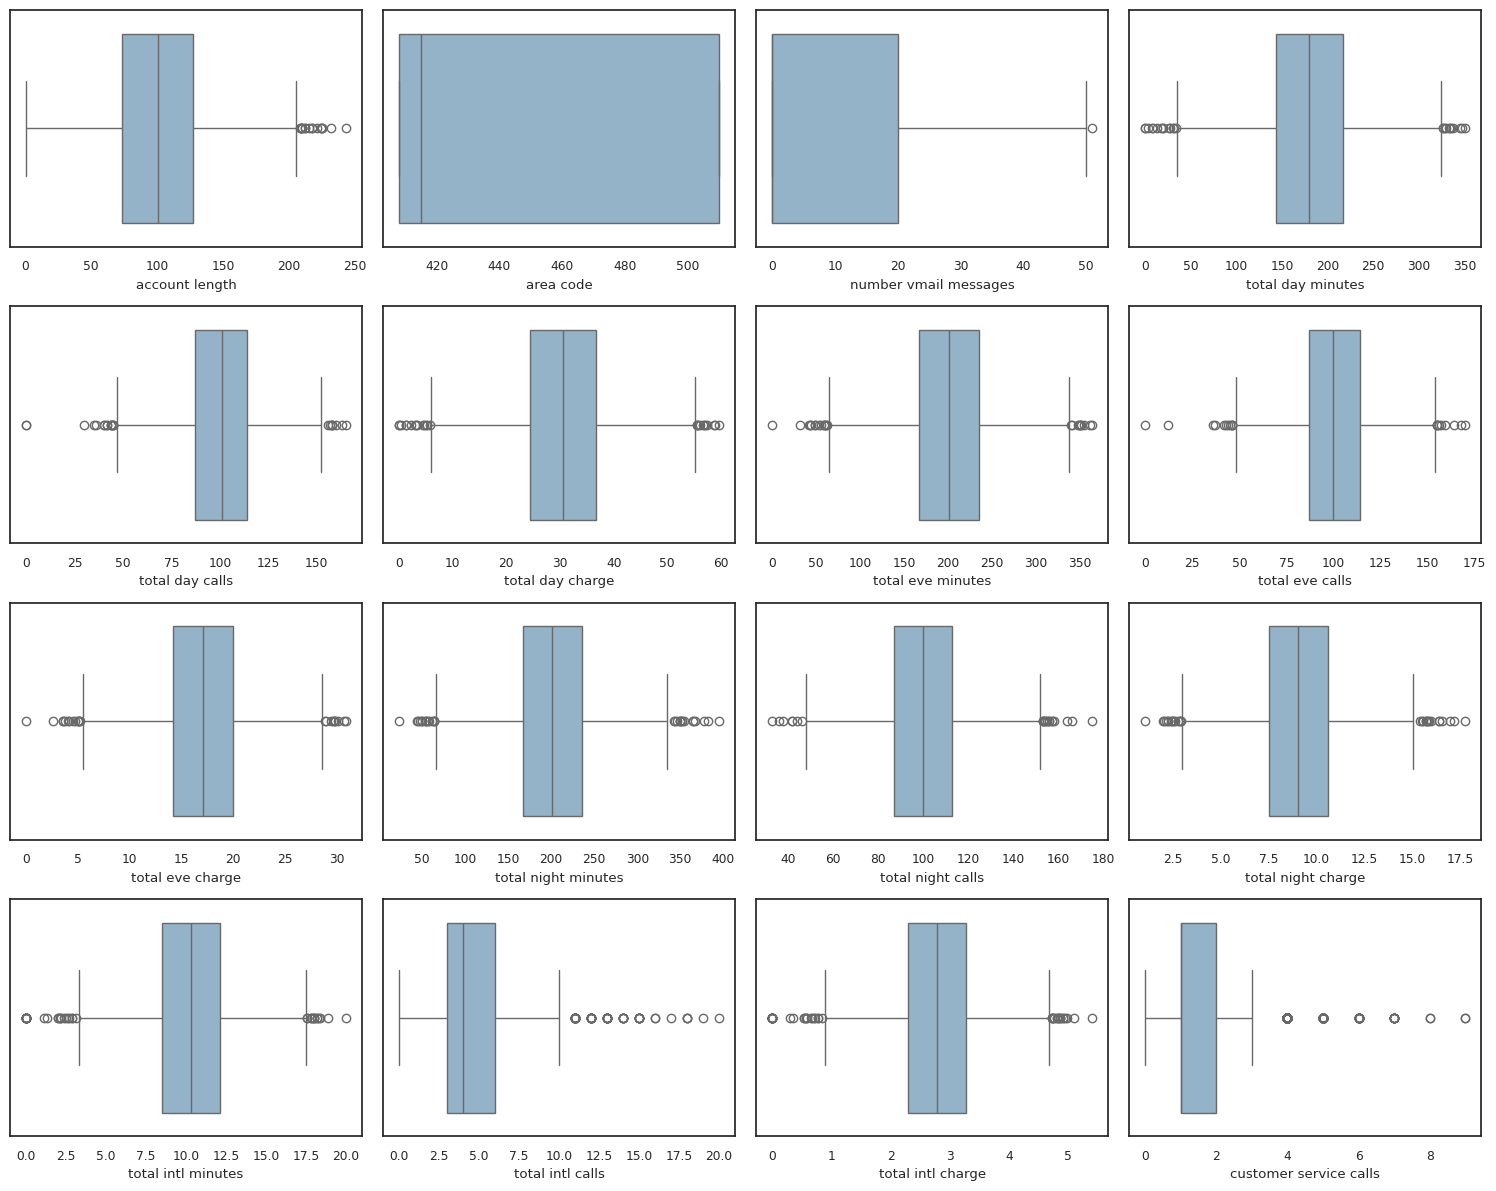

In [419]:
# Observing Outliers
plt.figure(figsize=(15, 12))

for i, col in enumerate(['account length', 'area code', 'number vmail messages',
                         'total day minutes', 'total day calls', 'total day charge',
                         'total eve minutes', 'total eve calls', 'total eve charge',
                         'total night minutes', 'total night calls', 'total night charge',
                         'total intl minutes', 'total intl calls', 'total intl charge',
                         'customer service calls']):

    plt.subplot(4, 4, i + 1)
    sns.boxplot(x=col, data=df)

plt.tight_layout()  # Adjust spacing between subplots
plt.show()

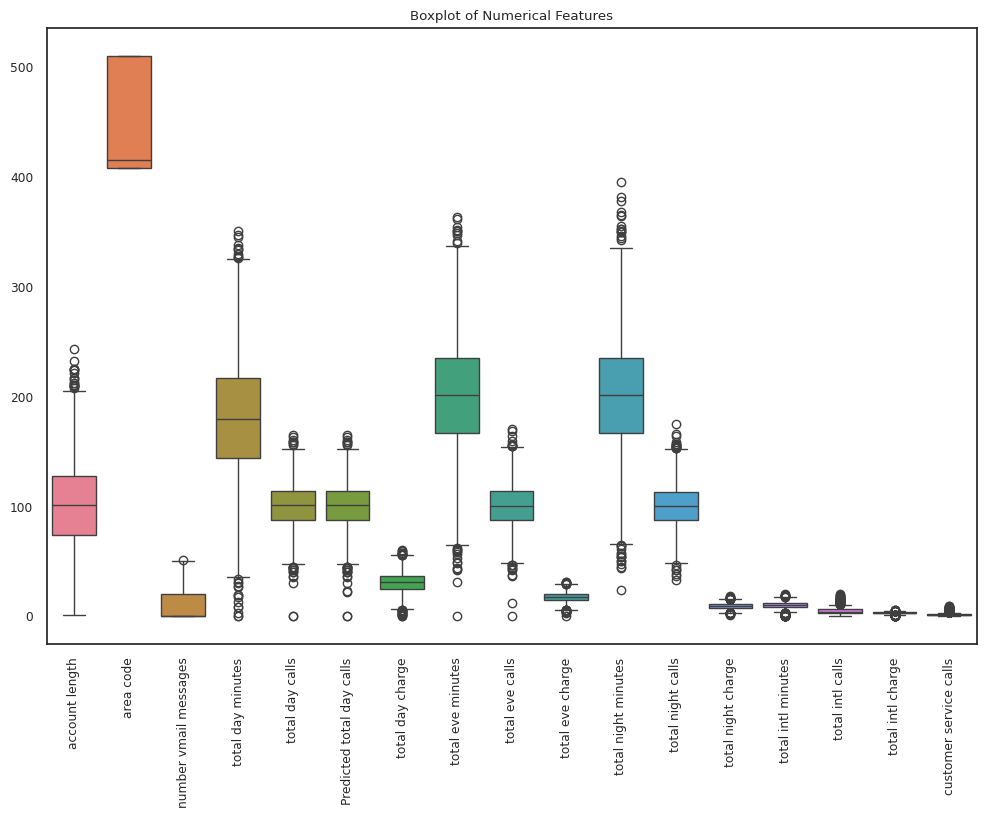

In [420]:
# Boxplot to Analyze Outliers
# Boxplot for numerical features
plt.figure(figsize=(12, 8))
sns.boxplot(data=df.select_dtypes(include=np.number))
plt.title('Boxplot of Numerical Features')
plt.xticks(rotation=90)
plt.show()

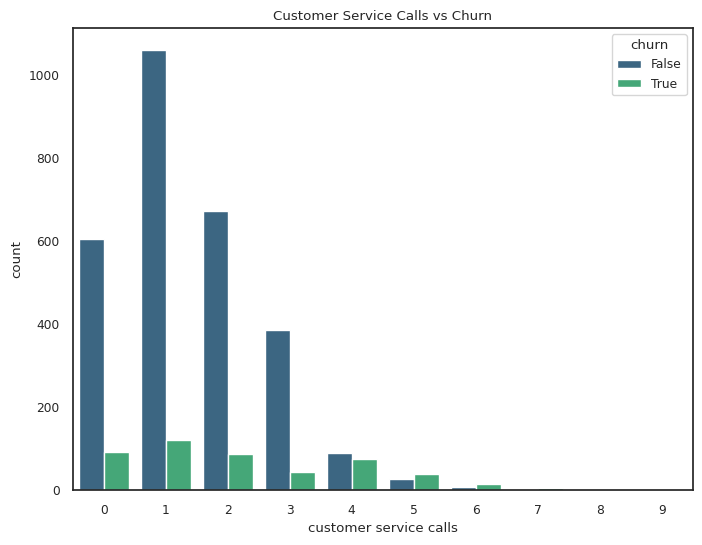

In [421]:
# Customer Service Calls vs Churn
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='customer service calls', hue='churn', palette='viridis')
plt.title('Customer Service Calls vs Churn')
plt.show()

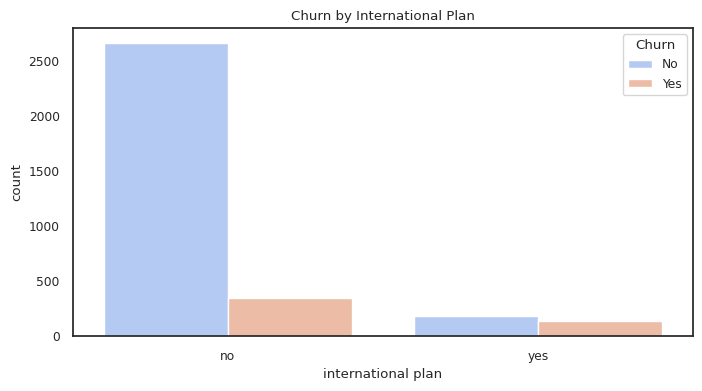

In [422]:
# Bar plot for Churn by International Plan
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='international plan', hue='churn', palette='coolwarm')
plt.title('Churn by International Plan')
plt.legend(title='Churn', labels=['No', 'Yes'])
plt.show()

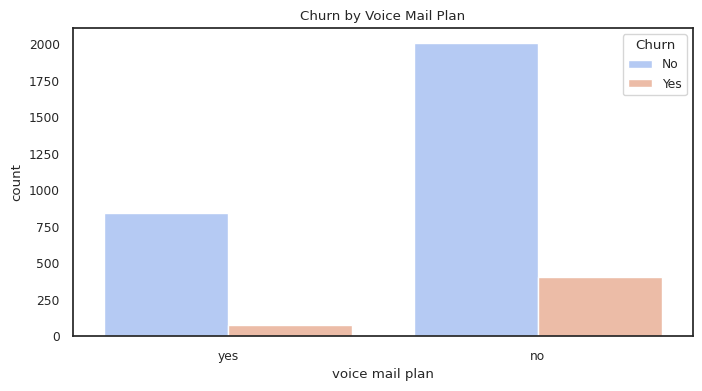

In [423]:
# Bar plot for Churn by Voice Mail Plan
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='voice mail plan', hue='churn', palette='coolwarm')
plt.title('Churn by Voice Mail Plan')
plt.legend(title='Churn', labels=['No', 'Yes'])
plt.show()

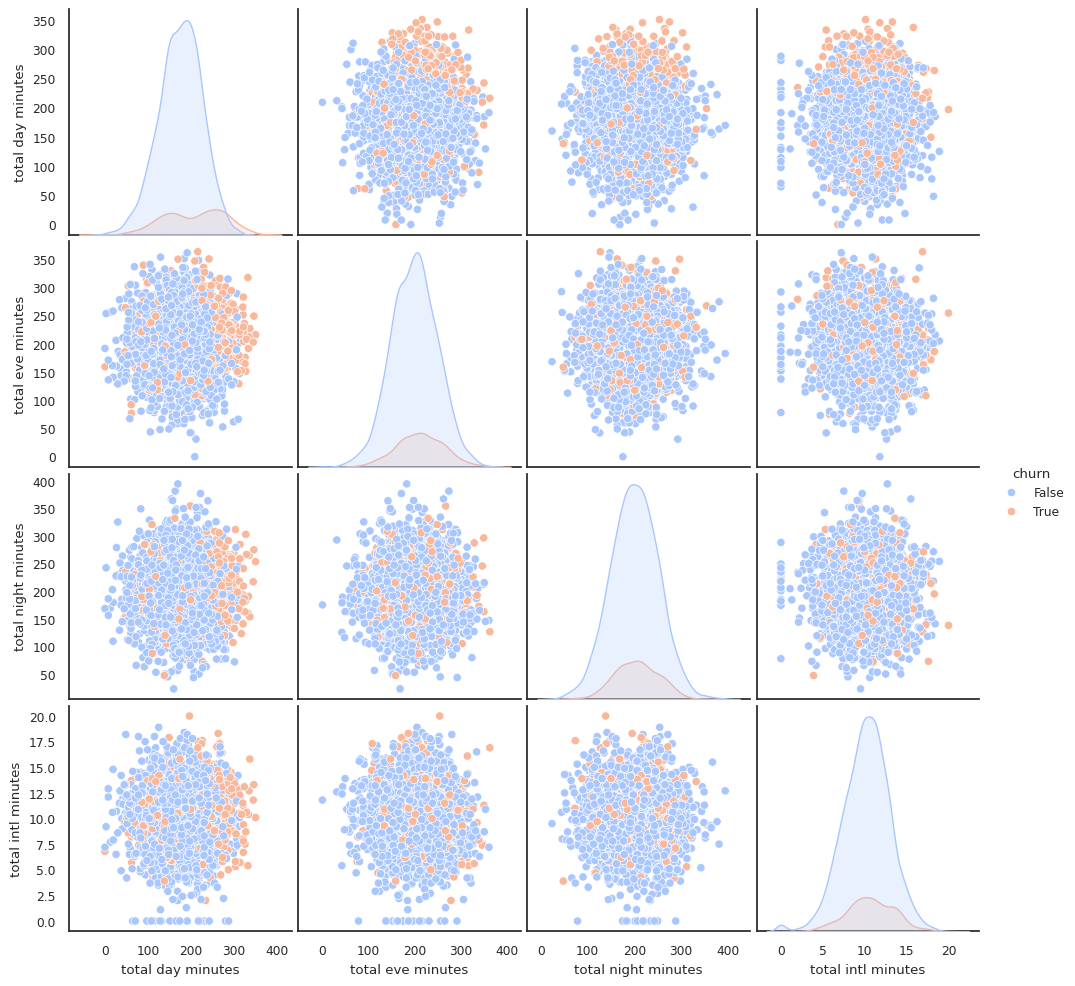

<Figure size 800x600 with 0 Axes>

In [424]:
# Pairplot for a subset of features
subset_features = ['total day minutes', 'total eve minutes', 'total night minutes', 'total intl minutes', 'churn']
sns.pairplot(df[subset_features], hue='churn', palette='coolwarm')
plt.figure(figsize=(8, 6))
plt.show()

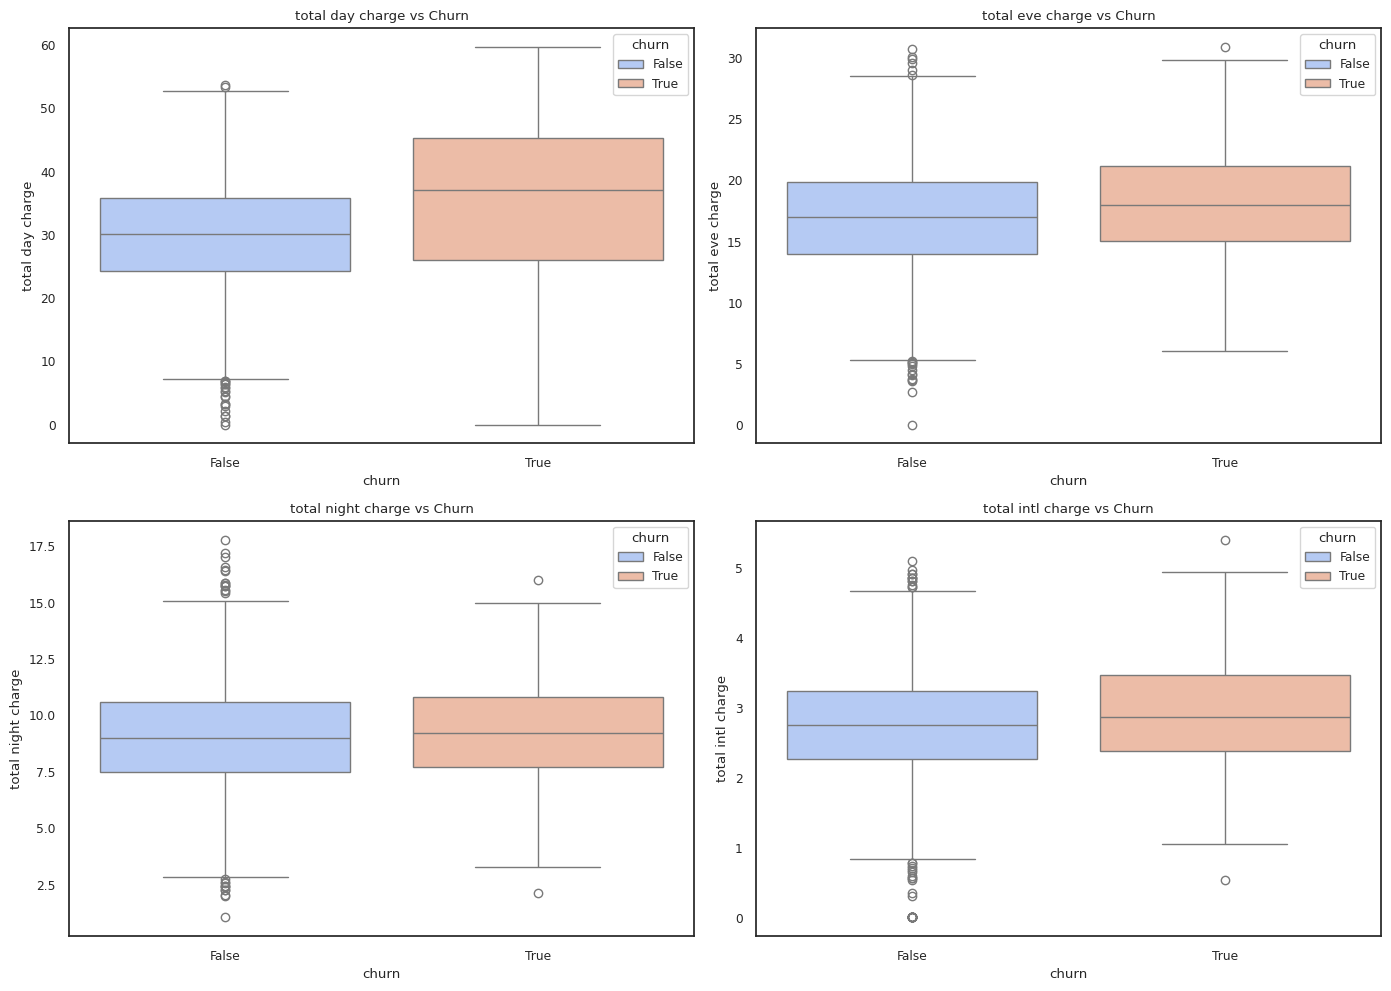

In [425]:
# Churn by Total Charges (Day, Evening, Night, and International)
# Boxplots for total charges vs churn
charge_columns = ['total day charge', 'total eve charge', 'total night charge', 'total intl charge']

plt.figure(figsize=(14, 10))
for i, col in enumerate(charge_columns, start=1):
    plt.subplot(2, 2, i)
    sns.boxplot(data=df, x='churn', y=col, hue='churn', palette='coolwarm')
    plt.title(f'{col} vs Churn')
plt.tight_layout()
plt.show()

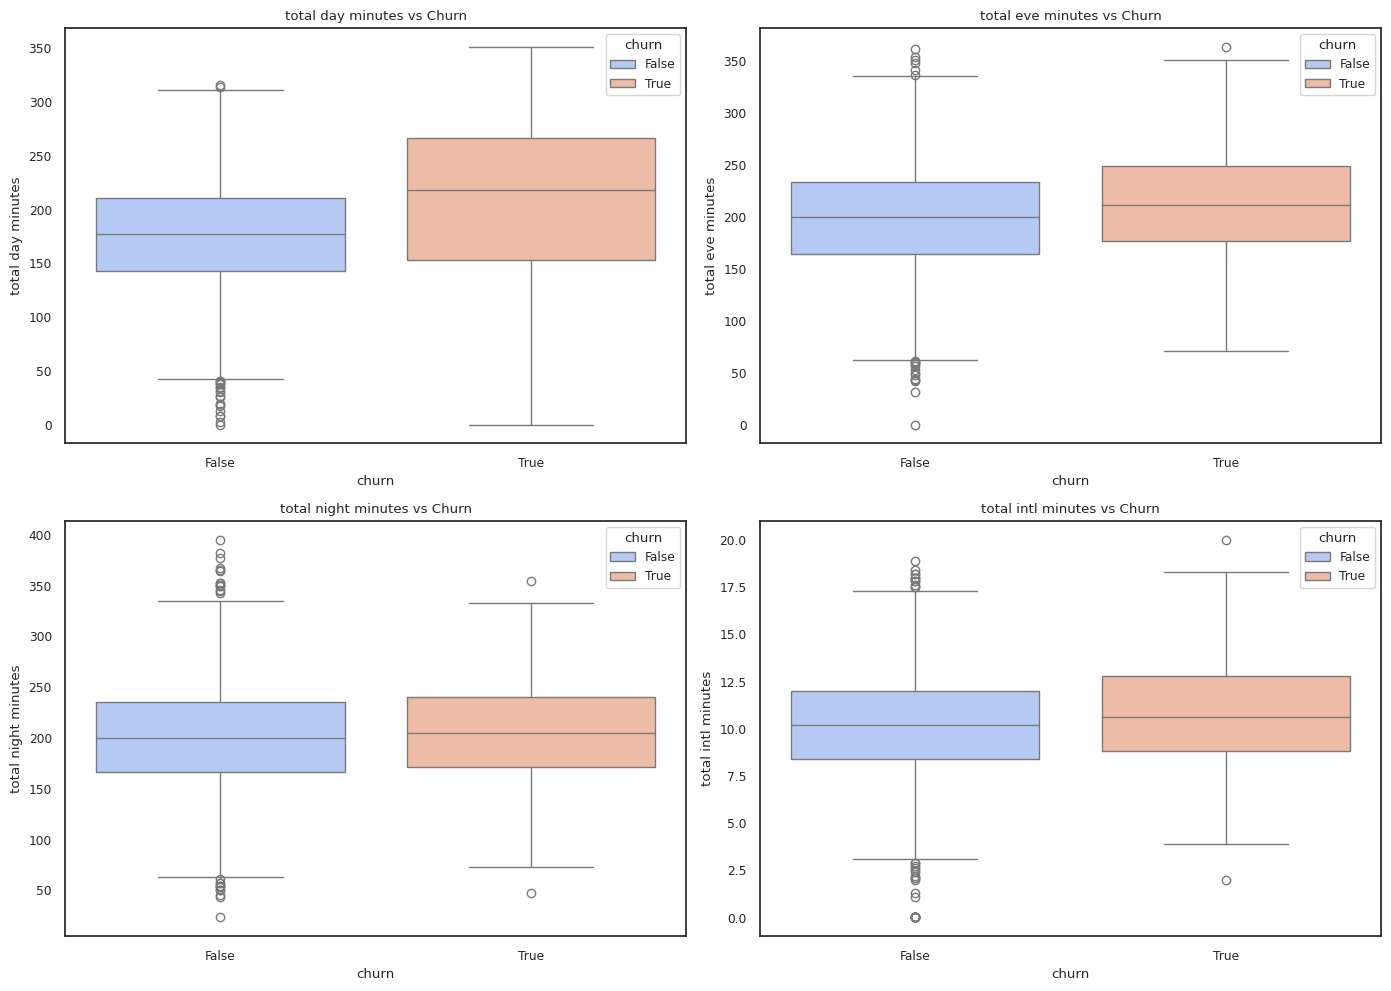

In [426]:
# Churn by Total Minutes (Day, Evening, Night, and International)
# Boxplots for total minutes vs churn
minute_columns = ['total day minutes', 'total eve minutes', 'total night minutes', 'total intl minutes']

plt.figure(figsize=(14, 10))
for i, col in enumerate(minute_columns, start=1):
    plt.subplot(2, 2, i)
    sns.boxplot(data=df, x='churn', y=col, hue='churn', palette='coolwarm')
    plt.title(f'{col} vs Churn')
plt.tight_layout()
plt.show()

The boxplots of **Churn by Total Charges (Day, Evening, Night, and International)** provide valuable insights into how the total charges for different times of the day relate to customer churn. Here's how you can interpret the boxplots:

1. **Total Day Charge vs Churn**
- *Median and Interquartile Range (IQR)*: If the median for Total Day Charge for customers who churned is significantly higher or lower than for customers who didn't churn, it suggests that the day charges may influence churn.
- *Outliers*: Outliers (data points far from the IQR) could indicate customers with exceptionally high or low charges. These outliers may be indicative of extreme usage patterns that contribute to churn.
- *Spread of Charges*: A wider spread (larger IQR) for one of the churn categories may suggest that Total Day Charge varies more for either churned or non-churned customers, indicating differing behavior patterns based on usage.

2. **Total Evening Charge vs Churn**
- *Comparison of Medians*: If the median charges for evening calls are higher for customers who churned, it suggests that customers who incur higher evening charges might be more likely to churn.
- *IQR*: A narrow IQR might suggest that the evening charges are more uniform across customers, whether they churned or not. A broader IQR may indicate a higher variance in evening usage.
- *Skewness*: If the data is skewed to one side, it could mean that there are specific pricing policies or usage behaviors affecting churn in a particular direction.

3. **Total Night Charge vs Churn**
- *Comparison of Distributions*: A similar analysis can be made for night charges. If churned customers consistently have higher night charges, this could suggest that night usage (e.g., late-night calls) plays a role in churn.
- *Outliers*: Nighttime outliers may indicate unusually high charges, possibly due to long international calls or other factors that might be connected to churn behavior.

4. **Total International Charge vs Churn**
- *Significance of International Charges*: If customers with higher international charges are more likely to churn, this may suggest that they are using international plans excessively and possibly incurring high costs. This could be a pain point leading to churn.
- *Disparities Between Churn and Non-Churn*: If there’s a large gap between churned and non-churned customers in terms of international charges, it could indicate that international charges are a strong factor contributing to churn.

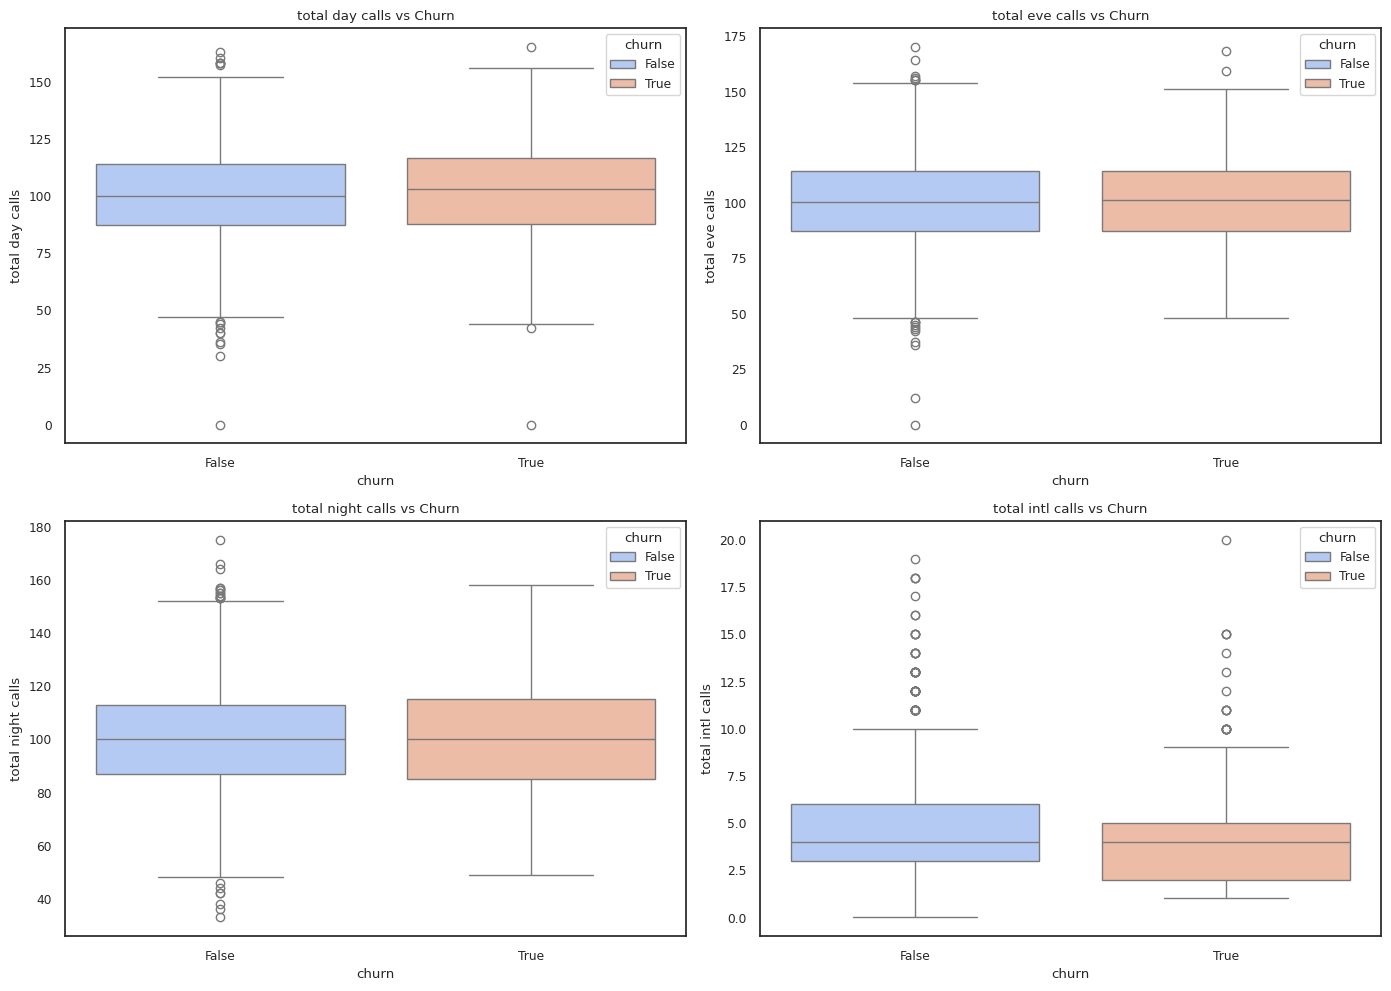

In [427]:
# Churn by Total Calls
# Boxplots for total calls vs churn
call_columns = ['total day calls', 'total eve calls', 'total night calls', 'total intl calls']

plt.figure(figsize=(14, 10))
for i, col in enumerate(call_columns, start=1):
    plt.subplot(2, 2, i)
    sns.boxplot(data=df, x='churn', y=col, hue='churn', palette='coolwarm')
    plt.title(f'{col} vs Churn')
plt.tight_layout()
plt.show()

**Key Inferences to Look For in the Boxplots:**

- Higher Charges and Churn: If churned customers tend to have higher charges (especially in one of the categories like day, evening, or international), this could indicate a financial burden leading to dissatisfaction and eventual churn.

- IQR and Spread: A wider spread or outliers among churned customers might suggest that these customers are experiencing more irregular billing or higher-than-expected usage, which might be contributing to their decision to leave.

- Overlap and Distribution: If the boxplots for churned and non-churned customers largely overlap, it may suggest that charges (day, evening, night, international) are not a strong predictor of churn on their own, and other factors like service quality or customer support might be more significant.

- Skewness and Trends: Skewed distributions could imply that a small segment of customers are responsible for extremely high charges, influencing the churn behavior.

By analyzing the boxplots, you can identify specific patterns or anomalies related to customer charges in different categories, which may suggest why certain customers churn. These insights can help refine customer retention strategies, such as targeted discounts or usage monitoring, to reduce churn.

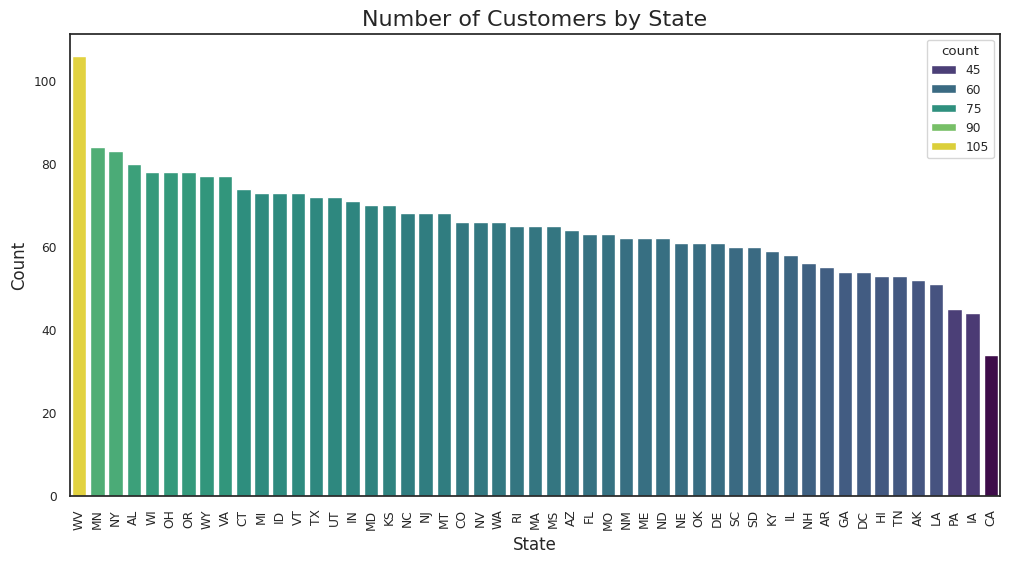

In [428]:
# Bar Plot for State-wise Customer Distribution
# Count of customers by state
state_counts = df['state'].value_counts()

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(x=state_counts.index, y=state_counts.values, palette='viridis', hue=state_counts)
plt.title('Number of Customers by State', fontsize=16)
plt.xlabel('State', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=90)
plt.show()

The bar plot shows the number of customers in each state, providing an overview of customer distribution. The US State, **West Virginia** has the highest no. of customers and **California** has the lowest no. of customers

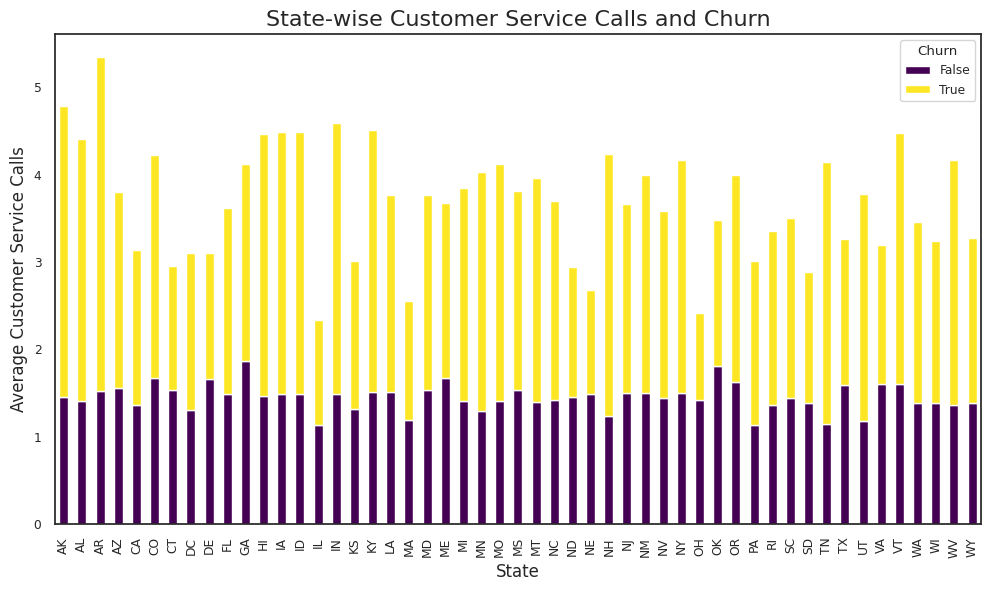

In [429]:
# State-wise Customer Service Calls vs Churn (Stacked Bar Plot)
# Aggregate data
state_service_calls = df.groupby(['state', 'churn'])['customer service calls'].mean().unstack()

# Plotting
state_service_calls.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')
plt.title('State-wise Customer Service Calls and Churn', fontsize=16)
plt.xlabel('State', fontsize=12)
plt.ylabel('Average Customer Service Calls', fontsize=12)
plt.xticks(rotation=90)
plt.legend(title='Churn')
plt.tight_layout()
plt.show()

This plot focuses on the churn rate for each state, providing insights into geographical patterns.

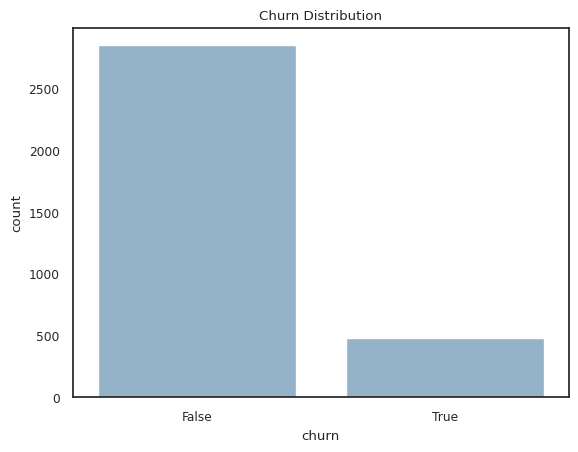

In [430]:
# Distribution of the Target Feature (churn)
sns.countplot(data=df, x='churn')
plt.title('Churn Distribution')
plt.show()

**Class Imbalance**

From the EDA, especially count plot, it can be inferred that the dataset is imbalanced (Churn Distribution: 14.5% - Churn, 85.5% - No churn), it's essential to balance the data to ensure that the model doesn't get biased towards the majority class. For this purpose, the Synthetic Minority Over-sampling Technique (SMOTE) is used, which generates synthetic samples for the minority class.

All these visualizations provide a comprehensive understanding of the dataset.

## Data Preprocessing

In [431]:
# Handle Categorical Variables
# Drop irrelevant columns
df = df.drop(['state', 'area code', 'phone number'], axis=1)

In [432]:
# Encode categorical features
label_encoder = LabelEncoder()
df['international plan'] = label_encoder.fit_transform(df['international plan'])
df['voice mail plan'] = label_encoder.fit_transform(df['voice mail plan'])
df['churn'] = label_encoder.fit_transform(df['churn'])

In [433]:
df.head()

,account length,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,Predicted total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,128,0,1,25,265.1,110,100,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,107,0,1,26,161.6,123,125,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,137,0,0,0,243.4,114,113,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,84,1,0,0,299.4,71,70,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,75,1,0,0,166.7,113,111,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


## Feature Selection: Heatmap

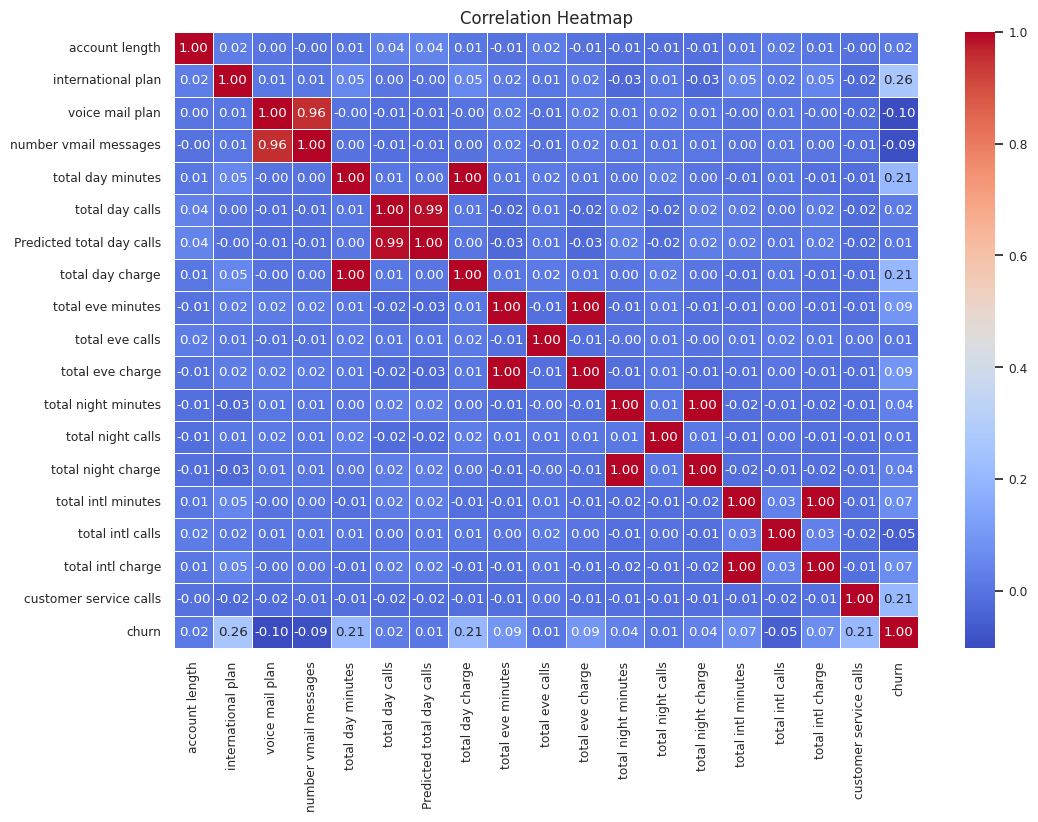

In [434]:
# Correlation Heatmap
plt.figure(figsize=(12, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title('Correlation Heatmap', fontsize=12)
plt.show()

Observe the last row 'churn' and note its correlation scores with different features.

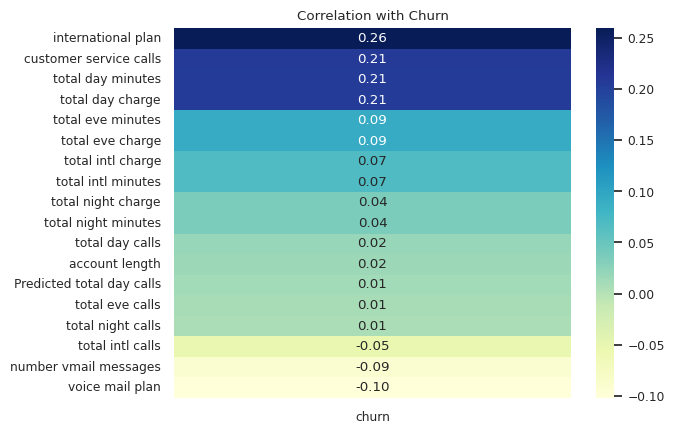

In [435]:
# Create a heatmap of the correlations with the target column
corr = df.corr()
target_corr = corr['churn'].drop('churn')

# Sort correlation values in descending order
target_corr_sorted = target_corr.sort_values(ascending=False)

sns.set(font_scale=0.8)
sns.set_style("white")
sns.set_palette("PuBuGn_d")
sns.heatmap(target_corr_sorted.to_frame(), cmap="YlGnBu", annot=True, fmt='.2f')
plt.title('Correlation with Churn')
plt.show()

We can observe that **International plan, customer service calls, total day minutes, total day charge are the most correlated with target variable 'Churn'**. International plan and customer service calls are the best indicators of churn outcome in this situation.

It is seen that with strongly correlated features, the target class can be predicted more easily, and more meaningful results can be drawn.

In [436]:
# Feature Scaling
# Using Quantile Transformer to remove outliers and Scale numerical features
from sklearn.preprocessing import QuantileTransformer
quantile = QuantileTransformer()
dfchurn = df.drop('churn', axis='columns')
# calculate median and IQR
quantile.fit(dfchurn)
dfq = quantile.transform(dfchurn)
dfchurn = pd.DataFrame(dfq, columns=dfchurn.columns)



```
plt.figure(figsize = (15,12))
for i,col in enumerate(['account length', 'number vmail messages', 'total day minutes',
            'total day calls', 'Predicted total day calls', 'total day charge',
            'total eve minutes', 'total eve calls', 'total eve charge',
            'total night minutes', 'total night calls', 'total night charge',
            'total intl minutes', 'total intl calls', 'total intl charge',
            'customer service calls']):
    plt.subplot(4,4, i+1)
    sns.boxplot(x = col, data = dfchurn)
plt.show()
```



Now, The outliers are removed from the dataset.

## Split The Data

The data is split into training and testing sets to evaluate the model.

In [438]:
# Split data into features and target
x = df.drop('churn', axis=1)
y = df['churn']

Resolving Class Imbalance in Target Variable Using Synthetic Minority Oversampling Technique (SMOTE)

In [439]:
!pip install imblearn

In [440]:
# Handle Class Imbalance
# import SMOTE module from imblearn library
# pip install imblearn (if you don't have imblearn in your system)
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 2)
x_res, y_res = sm.fit_resample(x, y)

print('Before OverSampling, the shape of x: {}'.format(x.shape))
print('Before OverSampling, the shape of y: {} \n'.format(y.shape))

print("Before OverSampling, counts of label '1' in y: {}".format(sum(y == 1)))
print("Before OverSampling, counts of label '0' in y: {} \n".format(sum(y == 0)))

print('After OverSampling, the shape of x: {}'.format(x_res.shape))
print('After OverSampling, the shape of y: {} \n'.format(y_res.shape))

print("After OverSampling, counts of label '1' in y: {}".format(sum(y_res == 1)))
print("After OverSampling, counts of label '0' in y: {}".format(sum(y_res == 0)))

Before OverSampling, the shape of x: (3333, 18)
Before OverSampling, the shape of y: (3333,) 

Before OverSampling, counts of label '1' in y: 483
Before OverSampling, counts of label '0' in y: 2850 

After OverSampling, the shape of x: (5700, 18)
After OverSampling, the shape of y: (5700,) 

After OverSampling, counts of label '1' in y: 2850
After OverSampling, counts of label '0' in y: 2850


SMOTE over-sampling:
churn
0    2850
1    2850
Name: count, dtype: int64


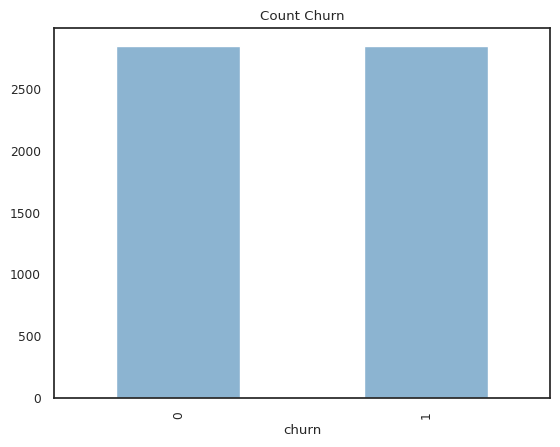

In [441]:
df_smote_over = pd.DataFrame(y_res, columns=['churn'])

print('SMOTE over-sampling:')
print(df_smote_over.churn.value_counts())

df_smote_over.churn.value_counts().plot(kind='bar', title='Count Churn');

In [442]:
# Train-test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

## Random Forest Classifier

Random Forest performs well on structured data.

In [443]:
# Initialize the model
rf = RandomForestClassifier(random_state=42)

# Fit the model
rf.fit(x_train, y_train)

# Predictions
y_pred = rf.predict(x_test)

The model can be evaluated using the confusion matrix, classification report, and accuracy score.

In [444]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       857
           1       0.94      0.68      0.79       143

    accuracy                           0.95      1000
   macro avg       0.95      0.84      0.88      1000
weighted avg       0.95      0.95      0.94      1000



In [445]:
print("Accuracy Score:", accuracy_score(y_test, y_pred))

Accuracy Score: 0.948


In [446]:
y_pred_proba_rf = rf.predict_proba(x_test)[:, 1]
[fpr2, tpr2, thr2] = roc_curve(y_test, y_pred_proba_rf)
# fpr - false positive rate, tpr - true positive rate, thr - threshold
print('Train/Test split results:\n')
print(rf.__class__.__name__+" basic accuracy is %2.3f" % accuracy_score(y_test, y_pred))
print(rf.__class__.__name__+" log_loss is %2.3f" % log_loss(y_test, y_pred_proba_rf))
print(rf.__class__.__name__+" auc is %2.3f" % auc(fpr2, tpr2))

Train/Test split results:

RandomForestClassifier basic accuracy is 0.948
RandomForestClassifier log_loss is 0.180
RandomForestClassifier auc is 0.937


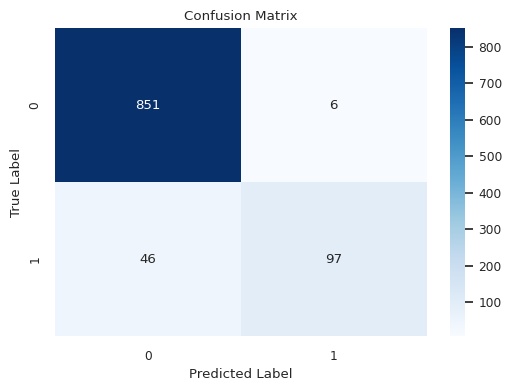

In [447]:
# Evaluation metrics
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

## Feature Importance

Feature importance helps us identify which features most influence the prediction.

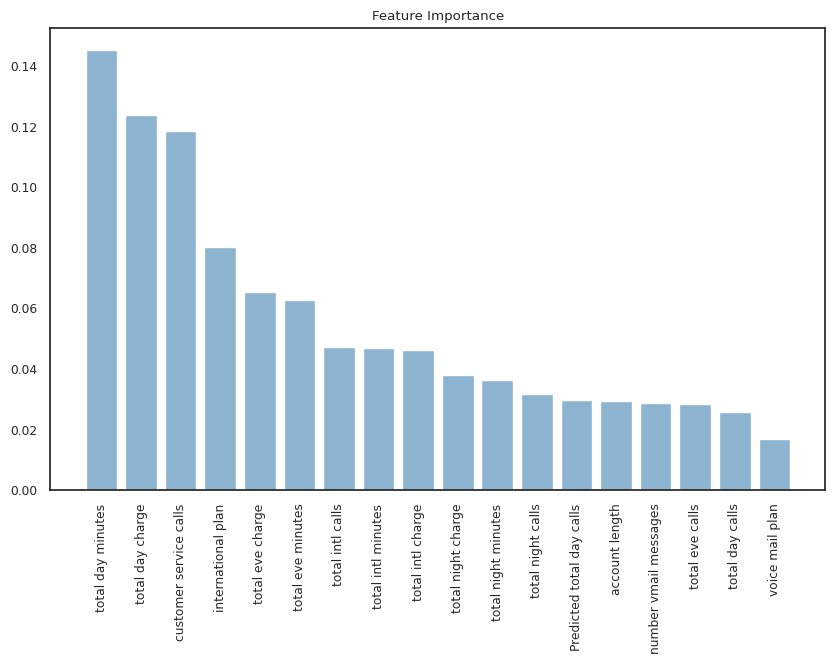

In [448]:
# Feature importance
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.bar(range(x.shape[1]), importances[indices], align="center")
plt.xticks(range(x.shape[1]), x.columns[indices], rotation=90)
plt.title("Feature Importance")
plt.show()

## Prediction

The new data should be in the same format as the training data, including having the same feature columns (excluding the target variable churn) and being preprocessed the same way.

In [449]:
print("Expected feature names:", rf.feature_names_in_)

Expected feature names: ['account length' 'international plan' 'voice mail plan'
 'number vmail messages' 'total day minutes' 'total day calls'
 'Predicted total day calls' 'total day charge' 'total eve minutes'
 'total eve calls' 'total eve charge' 'total night minutes'
 'total night calls' 'total night charge' 'total intl minutes'
 'total intl calls' 'total intl charge' 'customer service calls']


In [450]:
# Example new data (assuming one row of data)
new_data = pd.DataFrame({
    'account length': [77],
    'international plan': ['no'],
    'voice mail plan': ['no'],
    'number vmail messages': [0],
    'total day minutes': [62.4],
    'total day calls': [89],
    'Predicted total day calls': [90],
    'total day charge': [10.61],
    'total eve minutes': [169.9],
    'total eve calls': [121],
    'total eve charge': [14.44],
    'total night minutes': [209.6],
    'total night calls': [64],
    'total night charge': [9.43],
    'total intl minutes': [5.7],
    'total intl calls': [6],
    'total intl charge': [1.54],
    'customer service calls': [5]
})

new_data['international plan'] = new_data['international plan'].astype('category')
new_data['voice mail plan'] = new_data['voice mail plan'].astype('category')

# Apply the same preprocessing steps to new data
new_data['international plan'] = label_encoder.transform(new_data['international plan'])
new_data['voice mail plan'] = label_encoder.transform(new_data['voice mail plan'])

# Make a prediction
prediction = rf.predict(new_data)

# Interpret the result
print("Customer Churn Prediction:", prediction)
if prediction == 1:
    print("The customer is likely to churn.")
else:
    print("The customer is not likely to churn.")

Customer Churn Prediction: [1]
The customer is likely to churn.


**Meaning of Probability of Churning**

The probability of churning refers to the likelihood or chance that a customer will leave or discontinue using a service or product within a certain period. It is a measure of how likely a customer is to "churn," or in other words, cancel their subscription, stop using a service, or switch to a competitor.

Probability of Churning quantifies this likelihood, often expressed as a value between 0 and 1, where:
- A probability closer to 0 means that the customer is very unlikely to churn.
- A probability closer to 1 means that the customer is highly likely to churn.

**How is Probability of Churning Calculated?**

In a predictive model, such as a machine learning model, the probability of churning is calculated based on various factors or features about the customer. These features could include:
- Usage patterns (e.g., how often the customer uses the service, total charges, or service plan types).
- Customer behavior (e.g., complaints, customer service calls, or feedback).
- Demographic information (e.g., age, location, or subscription length).
- Engagement metrics (e.g., how actively the customer interacts with the service or product).

For example, a machine learning model might output a churn probability for each customer, where:
- A churn probability of 0.8 means there's an 80% chance the customer will churn.
- A churn probability of 0.2 means there's a 20% chance the customer will churn.

**Interpretation of Probability of Churning**

- **Low Probability of Churning** (e.g., 0 - 0.3): The customer is unlikely to churn. These customers are generally considered more satisfied or loyal, but may still benefit from continued engagement efforts.
- **Moderate Probability of Churning** (e.g., 0.3 - 0.7): These customers are somewhat at risk, and businesses might focus on improving their experience to prevent churn.
- **High Probability of Churning** (e.g., 0.7 - 1): The customer is at high risk of leaving. This can be used to identify customers who need targeted retention efforts, such as special offers, loyalty programs, or customer support interventions.

In [451]:
churn_prob = rf.predict_proba(new_data)   # churn probability, not churn rate
"""The predict_proba method is used to predict the probability of each class label, and it
returns the probability estimates for each possible class label. This method is often used
for binary or multi-class classification problems, where you want to know the probability of each possible outcome."""

# Access the probability of churn (class 1) from the array
churn_probability = churn_prob[0][1]  # Get the probability for class 1
print(f"Estimated likelihood of customer churn: {churn_probability:.2%}")  # Format the probability
if churn_probability >= 0.7:
    print(f"..High Probability of Churning..")
elif churn_probability <= 0.3:
    print(f"..Low Probability of Churning..")
else:
    print(f"..Moderate Probability of Churning..")

Estimated likelihood of customer churn: 79.00%
..High Probability of Churning..
